In [1]:
from ml.features.preprocessing import get_data
from ml.ml_functions.registry.model_registry import log_sklearn_model_to_mlflow
from ml.ml_functions.serve.mlflow_model_serve import mlflow_model_prediction

In [2]:
import os
os.path.join(os.path.abspath("metadata"), "acutal_model.txt")

'c:\\Users\\e-aut\\OneDrive\\Documents\\GitHub\\stock-prediction\\metadata\\acutal_model.txt'

## Load Dataset with new Features

In [3]:
stock_data, last_day_df = get_data(save_data=False, new_model=None)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
stock_data

Price,Close,Volume,Target,SMA 10,EMA 10,EMA 20,WMA 10,Momentum 10,SAR,RSI,...,^IBEX Close,SI=F Close,HG=F Close,NG=F Close,^TNX Close,^IRX Close,^FVX Close,^TYX Close,SPY Close,EFA Close
Ticker,^GSPC,^GSPC,,,,,,,,,...,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,,,
2000-09-18,1444.510010,9.625000e+08,0,1484.369006,1479.491052,1484.344255,1476.255833,-76.260010,1505.653274,35.962151,...,11188.087891,4.876000,0.9185,5.295,5.871,5.950,5.900,5.956,91.801697,22.202045
2000-09-19,1459.900024,1.024900e+09,0,1479.651013,1475.929047,1482.016233,1471.806927,-47.179932,1496.730622,43.209946,...,11065.489258,4.883000,0.9215,5.370,5.850,5.970,5.907,5.914,92.634621,22.202045
2000-09-20,1451.339966,1.104000e+09,0,1475.560010,1471.458305,1479.094683,1466.659464,-40.910034,1489.057141,40.466555,...,10901.289062,4.830000,0.9015,5.320,5.892,5.970,5.953,5.962,91.950409,22.202045
2000-09-21,1449.050049,1.105400e+09,0,1470.214014,1467.384077,1476.233290,1461.839471,-53.459961,1479.759991,39.739686,...,10803.389648,4.872000,0.9255,5.287,5.871,5.960,5.945,5.927,90.552238,22.202045
2000-09-22,1448.719971,1.185500e+09,0,1465.636011,1463.990603,1473.612974,1457.931463,-45.780029,1471.950384,39.629187,...,11029.389648,4.910000,0.9195,5.131,5.829,5.970,5.905,5.904,92.198296,22.202045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-11,6901.000000,5.021060e+09,0,6854.302979,6844.943788,6809.764519,6863.801980,88.390137,6766.917972,61.469302,...,16883.000000,63.929001,5.4270,4.231,4.141,3.568,3.715,4.790,687.139526,95.283424
2025-12-12,6827.410156,4.910160e+09,0,6852.135010,6841.755855,6811.445056,6858.912376,-21.679688,6791.495530,53.115635,...,16854.400391,61.362000,5.2835,4.113,4.194,3.525,3.751,4.858,679.751404,94.782501


In [5]:
last_day = stock_data.index[-1].strftime('%Y-%m-%d')

In [6]:
stock_data.to_csv(f'ml/data/training_data/sp500_training_data_to_{last_day}.csv', index=True)

## Train your Sklearn-Model

Modellname: ExtraTreesClassifier
Genauigkeit: 0.9158143194335169


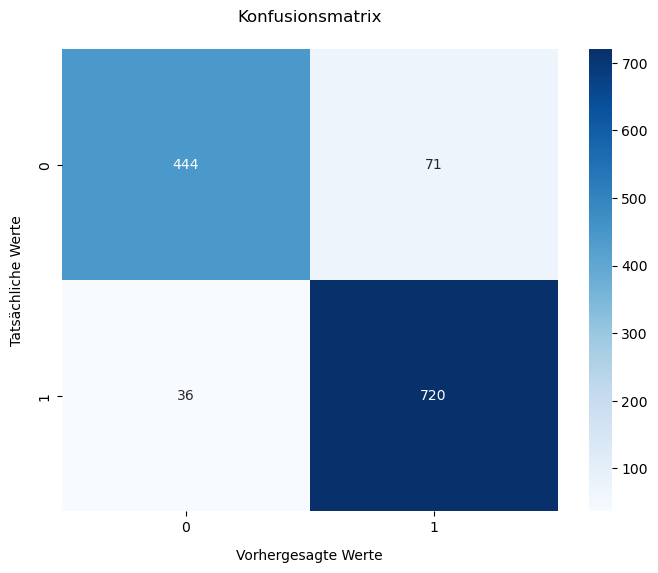

<Figure size 640x480 with 0 Axes>

In [7]:
from ml.ml_functions.training.train_extra_tree import train_extra_tree

model, accuracy = train_extra_tree(stock_data)

## Model Registry 

### mlflow server --host 0.0.0.0 --port 5000

In [8]:
actual_model_path = log_sklearn_model_to_mlflow(model=model, accuracy=accuracy)

2026/01/03 14:59:56 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/03 14:59:56 INFO mlflow.store.db.utils: Updating database tables
2026/01/03 14:59:56 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/03 14:59:56 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/03 14:59:56 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/03 14:59:56 INFO alembic.runtime.migration: Will assume non-transactional DDL.
c:\Users\e-aut\anaconda3\envs\scipy\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:178: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance. For migrating existing data, https://github.com/mlflow/mlflow-export-import can be used.

MLflow tracking URI set to: file:///C:/Users/e-aut/OneDrive/Documents/GitHub/stock-prediction/mlruns
Model path loaded!


MissingConfigException: Yaml file 'C:\Users\e-aut\OneDrive\Documents\GitHub\stock-prediction\mlruns\1\meta.yaml' does not exist.

In [ ]:
actual_model_path

## Test if model is working

In [ ]:
model.predict(last_day_df)

array([0])

## Save current feature data for prediction

In [ ]:
stock_data, last_day_df = get_data(save_data=True, new_model=(model.__class__.__name__, accuracy))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Complete. Return to the InfluxDB UI.
Saved Data to Influx and CSV


### Predict the new Data with Mlflow-Model

In [ ]:
result = mlflow_model_prediction(model=actual_model_path)
#result = mlflow_model_prediction()

Model path loaded!


OSError: No such file or directory: 'ml\models\mlartifacts\932838311827738885\7b685a7324064b27862a55436bde3803\artifacts\model'